{% include toc title="In This Chapter" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Chapter Eleven - Calculate Vegetation Indices From Remote Sensing Data Using Python

In this chapter, you will learn how to calculate vegetation indices such as normalized difference vegetation index (NDVI) and normalized burn ratio (NBR) from multispectral remote sensing data in **Python**. 

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Describe what a vegetation index is and how it is used with spectral remote sensing data.
* Describe how the `NDVI` index is used to quantify vegetation health (greeness).
* Calculate NDVI using multispectral imagery in **Python**.
* Describe how the `dNBR` index is used to quantify fire severity.
* Calculate `dNBR` using multispectral imagery in **Python**.


## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson and the Cold Springs Fire data.

{% include /data_subsets/course_earth_analytics/_data-cold-springs-fire.md %}

</div>

## About Vegetation Indices

A vegetation index is a single value that quantifies vegetation health or structure.
The math associated with calculating a vegetation index is derived from the physics
of light reflection and absorption across bands. For instance, it is known that
healthy vegetation reflects light strongly in the near infrared band and less strongly
in the visible portion of the spectrum. 

Thus, if you create a ratio between light
reflected in the near infrared and light reflected in the visible spectrum, it
will represent areas that potentially have healthy vegetation.


## Normalized Difference Vegetation Index (NDVI)

The Normalized Difference Vegetation Index (NDVI) is a quantitative index of
greenness ranging from 0-1 where 0 represents minimal or no greenness and 1
represents maximum greenness.

NDVI is often used for a quantitate proxy measure of vegetation health, cover
and phenology (life cycle stage) over large areas.

<figure>
 <a href="{{ site.url }}/images/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg">
 <img src="{{ site.url }}/images/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg" alt="NDVI image from NASA that shows reflectance."></a>
    <figcaption>NDVI is calculated from the visible and near-infrared light
    reflected by vegetation. Healthy vegetation (left) absorbs most of the
    visible light that hits it, and reflects a large portion of
    near-infrared light. Unhealthy or sparse vegetation (right) reflects more
    visible light and less near-infrared light.  Source: NASA
    </figcaption>
</figure>

* <a href="http://earthobservatory.nasa.gov/Features/MeasuringVegetation/measuring_vegetation_2.php" target="_blank">
More on NDVI from NASA</a>

### How to Derive the NDVI Vegetation Index From Multispectral Imagery

The normalized difference vegetation index (NDVI) uses a ratio between near infrared
and red light within the electromagnetic spectrum. To calculate NDVI you use the
following formula where NIR is near infrared light and
red represents red light. For your raster data, you will take the reflectance value
in the red and near infrared bands to calculate the index.

`(NIR - Red) / (NIR + Red)`

In [1]:
from glob import glob
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rasterio.plot import plotting_extent
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

sns.set_style('white')
sns.set(font_scale=1.5)
data1 = et.data.get_data('cold-springs-fire', verbose=False)
data2 = et.data.get_data('cs-test-landsat', verbose=False)
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

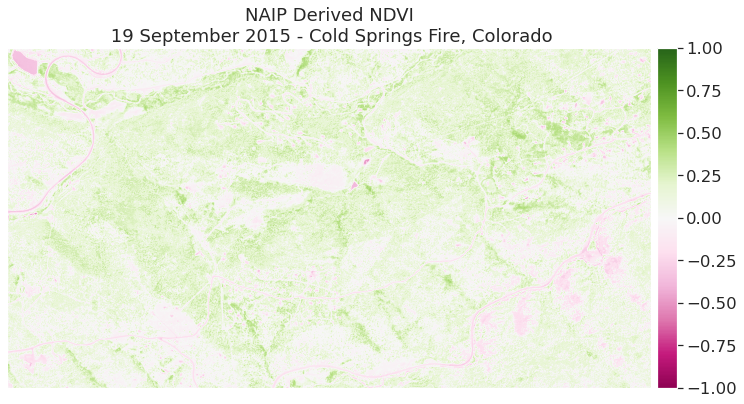

In [2]:
# Add plot of NDVI here
naip_data_path = os.path.join("cold-springs-fire",
                              "naip", 
                              "m_3910505_nw_13_1_20150919",
                              "crop", 
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1,
              vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

## Normalized Burn Ratio (NBR)

The Normalized burn ratio (NBR) is used to identify burned areas. The formula
is similar to a normalized difference vegetation index (NDVI), except that it
uses near-infrared (NIR) and shortwave-infrared (SWIR) portions of the
electromagnetic spectrum (Lopez, 1991; Key and Benson, 1995).

<figure class="half">
 <a href="{{ site.url}}/images/earth-analytics/remote-sensing/nbr-index.png">
 <img src="{{ site.url}}/images/earth-analytics/remote-sensing/nbr-index.png" alt="NBR - US Forest Service."></a>
    <figcaption>The normalized burn ratio (NBR) index uses the shortwave-infrared (SWIR) and near-infrared (NIR) portions of the electromagnetic
    spectrum.
    </figcaption>
</figure>

The NIR and SWIR parts of the electromagnetic spectrum are a powerful combination
of bands to use for this index given vegetation reflects strongly in the NIR region
of the electromagnetic spectrum and weakly in the SWIR. Alternatively, it has been
shown that a fire scar which contains scarred woody vegetation and earth will
reflect more strongly in the SWIR part of the electromagnetic spectrum and beyond
(see figure below).

<figure>
 <a href="{{ site.url}}/images/earth-analytics/remote-sensing/barc-spectral-response-US-forest-service.png">
 <img src="{{ site.url}}/images/earth-analytics/remote-sensing/barc-spectral-response-US-forest-service.png" alt="NBR - US Forest Service."></a>
    <figcaption>Plants reflect strongly in the NIR portion of the spectrum but
    spectrun. reflect much less strongly in the SWIR portion which makes this combination powerful for identifying areas with standing dead stems (fire scarred wood / bark) and soil / earth. Source: US Forest Service
    </figcaption>
</figure>


## NBR Bands

The NBR index was originally developed for use with Landsat TM and ETM+ bands 4 and 7,
but it will work with any multispectral sensor with a NIR
band between **760 - 900 nm** and a SWIR band between **2080 - 2350 nm**. Thus this
index can be used with both Landsat 8, MODIS and other multi (and hyper) spectral
sensors.

### NBR & Landsat 8

The table below which shows the band distribution of Landsat 8. These bands
are different from Landsat 7. What
bands should you use to calculate NBR using Landsat 8?

#### Landsat 8 Bands

| Band | Wavelength range (nanometers) | Spatial Resolution (m) | Spectral Width (nm)|
|-------------------------------------|------------------|--------------------|----------------|
| Band 1 - Coastal aerosol | 430 - 450 | 30 | 2.0 |
| Band 2 - Blue | 450 - 510 | 30 | 6.0 |
| Band 3 - Green | 530 - 590 | 30 | 6.0 |
| Band 4 - Red | 640 - 670 | 30 | 0.03 |
| Band 5 - Near Infrared (NIR) | 850 - 880 | 30 | 3.0 |
| Band 6 - SWIR 1 | 1570 - 1650 | 30 | 8.0  |
| Band 7 - SWIR 2 | 2110 - 2290 | 30 | 18 |
| Band 8 - Panchromatic | 500 - 680 | 15 | 18 |
| Band 9 - Cirrus | 1360 - 1380 | 30 | 2.0 |


### NBR & MODIS

Similarly the table below shows the band ranges for the MODIS sensor. What bands
should you use to calculate NBR using MODIS?

| Band | Wavelength range (nm) | Spatial Resolution (m) | Spectral Width (nm)|
|-------------------------------------|------------------|--------------------|----------------|
| Band 1 - red | 620 - 670 | 250 | 2.0 |
| Band 2 - near infrared | 841 - 876 | 250 | 6.0 |
| Band 3 -  blue/green | 459 - 479 | 500 | 6.0 |
| Band 4 - green | 545 - 565 | 500 | 3.0 |
| Band 5 - near infrared  | 1230 – 1250 | 500 | 8.0  |
| Band 6 - mid-infrared | 1628 – 1652 | 500 | 18 |
| Band 7 - mid-infrared | 2105 - 2155 | 500 | 18 |


### Example NBR Plots Calculated for Post and Pre Fire Landsat Images


In [3]:
# Import and stack post fire Landsat data
all_landsat_bands_path = os.path.join("cold-springs-fire", 
                                      "landsat_collect",
                                      "LC080340322016072301T1-SC20180214145802",
                                      "crop", 
                                      "*band*.tif")

all_landsat_bands = glob(all_landsat_bands_path)
all_landsat_bands.sort()

all_landsat_bands_xarray_list = [rxr.open_rasterio(
    image_path, masked=True).squeeze() for image_path in all_landsat_bands]
landsat_post_fire = xr.concat(all_landsat_bands_xarray_list, dim="band")

landsat_extent = list(landsat_post_fire.rio.bounds())
landsat_extent[1], landsat_extent[2] = landsat_extent[2], landsat_extent[1]

# Open fire boundary layer and reproject it to match the Landsat data
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers", 
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

# If the CRS are not the same, be sure to reproject
fire_bound_utmz13 = fire_boundary.to_crs(landsat_post_fire.rio.crs)

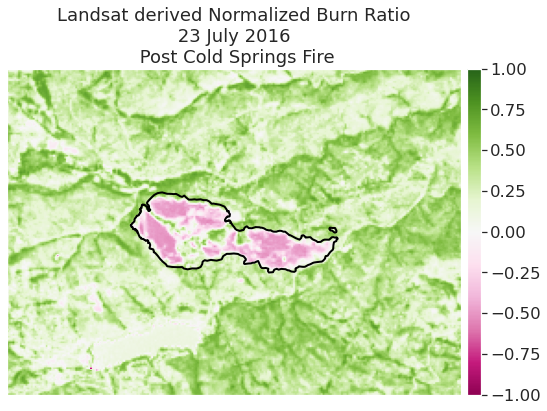

In [4]:
# Calculate NBR & plot
landsat_postfire_nbr = es.normalized_diff(
    landsat_post_fire[4], landsat_post_fire[6])

fig, ax = plt.subplots(figsize=(12, 6))

ep.plot_bands(landsat_postfire_nbr,
              cmap='PiYG',
              vmin=-1, vmax=1,
              extent=landsat_extent,
              title="Landsat derived Normalized Burn Ratio\n 23 July 2016 \n Post Cold Springs Fire",
              ax=ax,
              scale=False)

fire_bound_utmz13.plot(ax=ax, color='None',
                       edgecolor='black', linewidth=2)
plt.show()

In [5]:
# # Get bounds to create crop extent
# with rio.open(all_landsat_bands[0]) as src:
#     landsat_post_bounds = src.bounds

# # Create clip extent using the post fire data
# landsat_clip = mapping(box(*landsat_post_bounds))

# path_landsat_pre_st = os.path.join("data", "cold-springs-fire", "outputs", "landsat_pre_st_hw.tif")

# # Create the tif if it doesn't exist from previous lesson
# if not os.path.exists(path_landsat_pre_st):
#     landsat_paths_pre = glob(os.path.join("data", "cs-test-landsat", "*band*"))
#     landsat_paths_pre.sort()
#     es.stack(landsat_paths_pre, path_landsat_pre_st)

# # Open and crop landsat pre-fire data
# with rio.open(path_landsat_pre_st) as landsat_pre:
#     # crop landsat data using the fire boundary reprojected
#     landsat_pre_crop, landsat_pre_meta = es.crop_image(
#         landsat_pre, [landsat_clip])

# # Are the two rasters the same size?
# #landsat_pre_crop.shape == landsat_post_fire.shape

In [6]:
# nbr_landsat_pre_fire = es.normalized_diff(
#     landsat_pre_crop[4], landsat_pre_crop[6])

# # Plot the data
# ep.plot_bands(nbr_landsat_pre_fire,
#               cmap='PiYG',
#               vmin=-1, vmax=1,
#               title="Landsat derived Normalized Burn Ratio\n Pre Cold Springs Fire",
#               scale=False)
# plt.show()

## Difference NBR

The Normalized Burn Ratio is most powerful as a tool to better understand fire
extent and severity when used after calculating the difference between pre and post
fire conditions. This
difference is best measured using data collected immediately before the fire and
then immediately after the fire.
NBR is less effective if time has passed and vegetation regrowth / regeneration
has begun after the fire. Once vegetation regeneration has begun, the fire scar will begin
to reflect a stronger signal in the NIR portion of the spectrum because
healthy plants reflect strongly in the NIR portion due to the properties of
chlorophyll).

For this reason, the NBR ratio works better in areas like the United States where
plant regeneration is expected to occur more slowly. In areas like the tropics
which are wet and characterized by rapid regrowth, NBR may be less effective.

To calculate the difference NBR, you subtract the post-fire NBR raster from the pre-fire
NBR raster as follows:

<figure>
 <a href="{{ site.url}}/images/earth-analytics/remote-sensing/dnbr-equation.jpg">
 <img src="{{ site.url}}/images/earth-analytics/remote-sensing/dnbr-equation.jpg" alt="NBR - US Forest Service."></a>
    <figcaption>difference NBR (dNBR) equation.  <a href="http://gsp.humboldt.edu/OLM/Courses/GSP_216_Online/lesson5-1/NBR.html" target = "_blank">Source Humboldt.edu</a>
    </figcaption>
</figure>

The classification table below can be used to classify the difference raster according to
the severity of the burn.

| SEVERITY LEVEL  | | dNBR RANGE |
|------------------------------|
| Enhanced Regrowth | | < -.1 |
| Unburned       |  | -.1 to +.1 |
| Low Severity     | | +.1 to +.27 |
| Moderate Severity  | | +.27 to +.66 |
|===
| High Severity     |  | > .66 |

### How Severe is Severe?

It is important to keep in mind that that the classification table above is one
quantitative interpretation of what the results of dNBR actually mean. The term
"severity" is a qualitative term that could be quantified in different ways.
For instance, who is to say that .5 couldn't be representative of "high severity"
vs .66?

As scientists, the best way to make sure your classification approaches represent
what is actually happening on the ground in terms of fire severity is to check
out the actual conditions on the ground. This process of confirming a value that
you get from remote sensing data by checking it on the ground is called validation.

You can review more about ground validation as it applies to lidar data in the  
<a href="{{ site.url }}/courses/use-data-open-source-python/spatial-data-applications/lidar-remote-sensing-uncertainty/">chapter on uncertainty in remote sensing data</a>.

### NBR & Water - False Positives

The NBR index can be a powerful tool to identify pixels that have a high likelyhood
or being "burned". However it is important to know that this index is also
sensitive to water and thus sometimes, pixels that are classified as "high severity"
may actually be water. Because of this, it is important to mask out areas of water
PRIOR to performing any quantitative analysis on the difference NBR results.

### Example dNBR Plot Calculated from Pre and Post Fire Landsat Images

In [7]:
# # Calculate dnbr
# dnbr_landsat = nbr_landsat_pre_fire - landsat_postfire_nbr

# # define dNBR classification bins
# dnbr_class_bins = [-np.inf, -.1, .1, .27, .66, np.inf]

# dnbr_landsat_class = np.digitize(dnbr_landsat, dnbr_class_bins)

In [8]:
# dnbr_cat_names = ["Enhanced Regrowth",
#                   "Unburned",
#                   "Low Severity",
#                   "Moderate Severity",
#                   "High Severity"]

# nbr_colors = ["g", "yellowgreen",
#               "peachpuff", "coral", "maroon"]
# nbr_cmap = ListedColormap(nbr_colors)

In [9]:
# # Plot the data with a custom legend
# fig, ax = plt.subplots(figsize=(10, 8))

# im = ax.imshow(dnbr_landsat_class,
#                cmap=nbr_cmap,
#                extent=landsat_extent)

# fire_bound_utmz13.plot(ax=ax, color='None',
#                        edgecolor='black',
#                        linewidth=2)

# values = np.unique(dnbr_landsat_class.ravel())

# nbr_colors = [im.cmap(im.norm(value)) for value in values]
# patches = [mpatches.Patch(color=nbr_colors[i],
#                           label="{l}".format(l=dnbr_cat_names[i])) for i in range(len(dnbr_cat_names))]

# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1),
#            loc=2, borderaxespad=0.,
#            prop={'size': 13})

# ax.set_title("Landsat dNBR - Cold Spring Fire Site \n June 22, 2017 - July 24, 2017",
#              fontsize=16)

# # turn off ticks
# ax.set_axis_off()
# plt.show()

In [10]:
# unique, counts = np.unique(dnbr_landsat_class.ravel(), return_counts=True)

# fig, ax = plt.subplots(figsize=(12, 6))
# ax.bar(unique, counts,
#        color="purple")

# ax.set_title("Histogram of Landsat dNBR values",
#              fontsize=16)
# ax.set_xticks(unique)
# # get just the labels for unique values
# dnbr_lab = [dnbr_cat_names[i] for i in unique-1]
# ax.set_xticklabels(dnbr_lab)
# plt.show()